In [1]:
with open("../Figures/COVID/AA_sequence_combined.txt") as f:
    sarscov2_combined = f.read().strip()

In [2]:
from pepdata import iedb

In [3]:
df_mhc = iedb.mhc.load_dataframe()

In [4]:
df_tcell = iedb.tcell.load_dataframe()

                      Reference                                     \
                      Assay IRI                      Reference IRI   
0  http://www.iedb.org/assay/29  http://www.iedb.org/reference/274   
1  http://www.iedb.org/assay/37  http://www.iedb.org/reference/281   
2  http://www.iedb.org/assay/42  http://www.iedb.org/reference/283   
3  http://www.iedb.org/assay/43  http://www.iedb.org/reference/283   
4  http://www.iedb.org/assay/47  http://www.iedb.org/reference/275   

                                                                              \
         Type   PubMed ID                                            Authors   
0  Literature  15448372.0  Yi-Hsiang Huang; Mi-Hua Tao; Cheng-po Hu; Wan-...   
1  Literature   7684468.0  V J La Posta; D D Auperin; R Kamin-Lewis; G A ...   
2  Literature  15634878.0    Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh   
3  Literature  15634878.0    Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh   
4  Literature  15519708.0  Ol

In [5]:
df_tcell["Epitope"]

,Epitope IRI,Object Type,Description,Starting Position,Ending Position,Non-peptidic epitope IRI,Antigen Name,Antigen IRI,Parent Protein,Parent Protein IRI,Organism Name,Organism IRI,Parent Species,Epitope Comments
0,http://www.iedb.org/epitope/31803,Linear peptide,KLEDLERDL,26.0,34.0,NaN,large delta antigen,http://www.ncbi.nlm.nih.gov/protein/AAG26087.1,Large delta antigen,http://www.uniprot.org/uniprot/P29996,Hepatitis delta virus TW2667,https://ontology.iedb.org/ontology/ONTIE_0000432,Hepatitis delta virus,NaN
1,http://www.iedb.org/epitope/25946,Linear peptide,IEQQADNMITEMLQK,403.0,417.0,NaN,Glycoprotein polyprotein,http://www.ncbi.nlm.nih.gov/protein/P08669.1,Pre-glycoprotein polyprotein GP complex,http://www.uniprot.org/uniprot/P08669,Lassa mammarenavirus,http://purl.obolibrary.org/obo/NCBITaxon_11620,Lassa mammarenavirus,NaN
2,http://www.iedb.org/epitope/21045,Linear peptide,GLNGPDIYKGVYQFKSVEFD,61.0,80.0,NaN,Glycoprotein polyprotein,http://www.ncbi.nlm.nih.gov/protein/P07399.1,Pre-glycoprotein polyprotein GP complex,http://www.uniprot.org/uniprot/P09991,Lymphocytic choriomeningitis virus (strain Arm...,http://purl.obolibrary.org/obo/NCBITaxon_11624,Lymphocytic choriomeningitis mammarenavirus,NaN
3,http://www.iedb.org/epitope/58012,Linear peptide,SGEGWPYIACRTSVVGRAWE,309.0,328.0,NaN,Nucleoprotein,http://www.ncbi.nlm.nih.gov/protein/P07400.1,Nucleoprotein,http://www.uniprot.org/uniprot/P09992,Lymphocytic choriomeningitis virus (strain Arm...,http://purl.obolibrary.org/obo/NCBITaxon_11624,Lymphocytic choriomeningitis mammarenavirus,NaN
4,http://www.iedb.org/epitope/9203,Linear peptide,DLMGYIPLV,132.0,140.0,NaN,Genome polyprotein,http://www.ncbi.nlm.nih.gov/protein/P26664.3,Genome polyprotein,http://www.uniprot.org/uniprot/P27958,Hepatitis C virus subtype 1a,http://purl.obolibrary.org/obo/NCBITaxon_31646,Hepacivirus C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331173,http://www.iedb.org/epitope/13135,Linear peptide,ELKRKMMYM,199.0,207.0,NaN,UL123; IE1,http://www.ncbi.nlm.nih.gov/protein/AAR31504.1,55 kDa immediate-early protein 1,http://www.uniprot.org/uniprot/F5HCM1,Human betaherpesvirus 5,http://purl.obolibrary.org/obo/NCBITaxon_10359,Human betaherpesvirus 5,NaN
331174,http://www.iedb.org/epitope/561717,Linear peptide,NNYDPTEEIPAPLGTPDF,309.0,326.0,NaN,capsid protein,http://www.ncbi.nlm.nih.gov/protein/AAD40490.1,Capsid protein VP1,http://www.uniprot.org/uniprot/Q83884,Norovirus GII.4,http://purl.obolibrary.org/obo/NCBITaxon_489821,Norwalk virus,NaN
331175,http://www.iedb.org/epitope/561785,Linear peptide,TRAHKATVSTGSVHFTPK,344.0,361.0,NaN,capsid protein,http://www.ncbi.nlm.nih.gov/protein/AAD40490.1,Capsid protein VP1,http://www.uniprot.org/uniprot/Q83884,Norovirus GII.4,http://purl.obolibrary.org/obo/NCBITaxon_489821,Norwalk virus,NaN
331176,http://www.iedb.org/epitope/739863,Linear peptide,PAPLGTPDF,318.0,326.0,NaN,capsid protein,http://www.ncbi.nlm.nih.gov/protein/AAD40490.1,Capsid protein VP1,http://www.uniprot.org/uniprot/Q83884,Norovirus GII.4,http://purl.obolibrary.org/obo/NCBITaxon_489821,Norwalk virus,NaN


In [6]:
mhc_organisms = set(df_mhc["Epitope"]["Organism Name"].unique())

In [7]:
tcell_organisms = set(df_tcell["Epitope"]["Organism Name"].unique())

In [8]:
df_tcell["Epitope"]["Parent Species"].value_counts()[:20]

Vaccinia virus                                 32738
Mycobacterium tuberculosis                     32167
Homo sapiens                                   27410
Blattella germanica                            17205
Hepacivirus C                                  15232
Phleum pratense                                12946
Mus musculus                                   11941
Influenza A virus                              11552
Burkholderia pseudomallei                      10908
Dengue virus                                    8856
Lymphocytic choriomeningitis mammarenavirus     5217
Human betaherpesvirus 5                         4732
Human gammaherpesvirus 4                        4604
Dermatophagoides                                4332
Plasmodium falciparum                           4301
Human betaherpesvirus 6B                        3250
Human alphaherpesvirus 2                        3030
Francisella tularensis                          2915
Hepatitis B virus                             

In [9]:
viruses = set([])
coronaviruses = set([])
for o in tcell_organisms:
    if type(o) is str:
        o_lower = o.lower()
        if "virus" in o_lower:
            viruses.add(o)
        for substring in {"cov-", "hcov", "sars",  "coronavirus", "hku1", "nl63", "229e", "oc43"}:
            if substring in o_lower:
                coronaviruses.add(o)
            
for o in mhc_organisms:
    if type(o) is str:
        o_lower = o.lower()
        if "virus" in o_lower:
            viruses.add(o)
        for substring in {"cov-", "hcov", "sars",  "coronavirus", "hku1", "nl63", "229e", "oc43"}:
            if substring in o_lower:
                coronaviruses.add(o)
print(coronaviruses)

{'SARS coronavirus', 'SARS coronavirus TJF', 'SARS coronavirus Frankfurt 1', 'Bat SARS CoV Rp3/2004', 'Feline coronavirus', 'Human coronavirus OC43', 'Middle East respiratory syndrome-related coronavirus', 'SARS coronavirus BJ01', 'SARS coronavirus Urbani', 'Human coronavirus 229E', 'Bovine enteric coronavirus (strain 98TXSF-110-ENT)', 'SARS coronavirus Tor2', 'SARS-related coronavirus'}


In [10]:
sars_organisms = { 
    "SARS-related coronavirus",
    "SARS coronavirus Urbani",
    "SARS coronavirus Tor2",
    "SARS coronavirus Frankfurt 1",
    "SARS coronavirus TJF",
    "SARS coronavirus",
    "SARS coronavirus BJ01",
}


In [11]:
df_tcell_virus = df_tcell[df_tcell["Epitope"]["Organism Name"].isin(viruses)];

df_tcell_cov = df_tcell[df_tcell["Epitope"]["Organism Name"].isin(coronaviruses)];

df_tcell_sars = df_tcell[df_tcell["Epitope"]["Organism Name"].isin(sars_organisms)];

print("%d T-cell entries for CoVs (%d for SARS, %d for all viruses)" % (
    len(df_tcell_cov),
    len(df_tcell_sars), 
    len(df_tcell_virus),
))


1469 T-cell entries for CoVs (1440 for SARS, 129813 for all viruses)


In [12]:
df_mhc_virus = df_mhc[df_mhc["Epitope"]["Organism Name"].isin(viruses)];
df_mhc_cov = df_mhc[df_mhc["Epitope"]["Organism Name"].isin(coronaviruses)];
df_mhc_sars = df_mhc[df_mhc["Epitope"]["Organism Name"].isin(sars_organisms)];


print("%d MHC entries for CoVs (%d for SARS, %d for all viruses)" % (
    len(df_mhc_cov),
    len(df_mhc_sars), 
    len(df_mhc_virus),
))


13448 MHC entries for CoVs (13432 for SARS, 159529 for all viruses)


In [13]:
sars2_kmers = set([])
for k in range(7, 26):
    for i in range(len(sarscov2_combined) - k + 1):
        sars2_kmers.add(sarscov2_combined[i:i+k])

In [14]:
len(sars2_kmers)

184034

In [15]:
df_tcell_sars2 = df_tcell_sars[df_tcell_sars["Epitope"]["Description"].isin(sars2_kmers)];
df_tcell_sars2.to_csv("iedb-tcell-sars2.csv", index=False)
len(df_tcell_sars2)

339

In [16]:
df_mhc_sars2 = df_mhc_virus[df_mhc_virus["Epitope"]["Description"].isin(sars2_kmers)];
df_mhc_sars2.to_csv("iedb-mhc-sars2.csv", index=False)
len(df_mhc_sars2)

5072

In [17]:
df_mhc_sars2["Assay"]["Method/Technique"].value_counts()

purified MHC/competitive/radioactivity    3783
purified MHC/direct/fluorescence          1095
purified MHC                                57
purified MHC/direct/radioactivity           55
cellular MHC/direct/fluorescence            54
cellular MHC/competitive/fluorescence       19
purified MHC/competitive/fluorescence        7
x-ray crystallography                        2
Name: Method/Technique, dtype: int64

In [18]:
df_tcell_sars2["Assay"]["Method/Technique"].value_counts()

ELISPOT                   164
ELISA                      49
ICS                        38
3H-thymidine               35
multimer/tetramer          16
51 chromium                15
in vivo assay               9
in vitro assay              8
in vivo skin test           2
biological activity         2
intracellular staining      1
Name: Method/Technique, dtype: int64

In [19]:
from collections import defaultdict, OrderedDict

def write_dataframe(df_new, output_csv_filename):    
    df_new.to_csv(output_csv_filename, index=False)
    print("Wrote %d items to %s (%0.2f%% in SARS2)" % (
        len(df_new), 
        output_csv_filename,
        100 * df_new.in_sars2.mean()))


def annotate_dataframe(df_new):
    df_new["allele"] = [
        allele.replace("DRA*01:01/", "")
        for allele in df_new["allele"]
    ]
    df_new["in_sars2"] = df_new.peptide.map(lambda peptide: peptide in sars2_kmers)
    df_new["species_prefix"] = df_new.allele.str.split("-").map(
        lambda x: x[0] if len(x) > 1 else "HLA")
    species_prefix_to_name_mapping = {
        "HLA": "human", 
        "H2": "mouse", 
        "RT1": "rat", 
        "Mamu": "macaque",
        "Patr": "chimp",
        "Eqca": "horse", 
        "BoLA" : "cow",
        "SLA": "pig",
        "DLA": "dog"
    }
    df_new["species"] = df_new["species_prefix"].map(lambda x:
        species_prefix_to_name_mapping.get(x, "other"))
    
    print("Species counts:\n%s" % (df_new.species.value_counts()))
    
    mhc_gene_names = []
    mhc_class = []
    for allele in df_new.allele:
        if allele[:4] in {"H2-K", "H2-D", "H2-L"}:
            mhc_gene_names.append(allele[3])
            mhc_class.append("I")
        elif allele[:4] in {"H2-Q", "H2-M"}:
            mhc_gene_names.append(allele[3])
            mhc_class.append("Ib")
        elif allele[:4] == "H2-I":
            mhc_gene_names.append(allele[3:5])
            mhc_class.append("II")
        elif "*" in allele:
            parts = allele.split("-")
            
            if len(parts) == 1:
                gene_and_code = parts[0]
            else:
                _, gene_and_code = parts
            
            gene_name = gene_and_code.split("*")[0]
            
            mhc_gene_names.append(gene_name)
            
            if gene_name[:1] in {"A", "B", "C"}:
                mhc_class.append("I")
            elif gene_name[:1] == "E":
                mhc_class.append("Ib")
            elif gene_name[:2] in {"DR", "DQ", "DP"}:
                mhc_class.append("II")
            else:
                mhc_class.append("?")
        else:
            mhc_gene_names.append("?")
            mhc_class.append("?")
    if len(mhc_gene_names) != len(df_new):
        assert False, (len(mhc_gene_names), len(df_new))
    df_new["mhc_gene_name"] = mhc_gene_names
    df_new["mhc_class"] = mhc_class
    return df_new

def create_allele_mask(alleles):
    null_mask = alleles.isnull()
    comma_allele_mask = alleles.str.contains(",", na=False)
    mutant_allele_mask = alleles.str.contains("mutant", na=False)
    space_allele_mask = alleles.str.contains(" ", na=False)
    star_allele_mask = alleles.str.contains("*", na=False, regex=False)
    mouse_allele_mask = alleles.str.startswith("H2", na=False)
    # mice have only genotype equivalent serotypes like H2-Kb
    no_star_allele_mask = ~(star_allele_mask | mouse_allele_mask)
    bad_allele_mask = (
        comma_allele_mask | mutant_allele_mask | space_allele_mask | no_star_allele_mask | null_mask).values
    return ~bad_allele_mask

def create_peptide_mask(peptides, max_peptide_length=35, min_peptide_length=8):
    peptides_too_long = peptides.str.len() > max_peptide_length
    peptides_too_short = peptides.str.len() < min_peptide_length
    peptides_invalid_chars = peptides.str.contains(" ", na=False)
    peptides_null = peptides.isnull()
    peptides_invalid = peptides_too_short | peptides_too_long | peptides_invalid_chars | peptides_null
    all_upper = peptides.str.isupper()
    good_mask = all_upper & ~peptides_invalid
    return good_mask


In [20]:

def aggregate_mhc_results(
        df_mhc,
        assays,
        output_csv_filename=None):
    if type(assays) is str:
        assays = {assays}
    elif type(assays) in (list, tuple):
        assays = set(assays)
        
    df_mhc_assay = df_mhc[df_mhc["Assay"]["Method/Technique"].isin(assays)]
    print("===\nSelected %d entries for assays %s" % (len(df_mhc_assay), assays))
    
    
    peptides = df_mhc_assay[("Epitope", "Description")]
    alleles = df_mhc_assay["MHC"]["Allele Name"]
    good_allele_mask = create_allele_mask(alleles)
    bad_allele_mask = ~good_allele_mask
    print("-- Dropping %d/%d entries with bad alleles" % (bad_allele_mask.sum(), len(bad_allele_mask)))
    
    affs = df_mhc_assay[("Assay", "Quantitative measurement")]
    null_affinity = affs.isnull()
    valid_affinity = ~null_affinity
    valid_affinity_mask = valid_affinity.values
    print("-- Dropping %d/%d entries with bad affinities" % ((~valid_affinity_mask).sum(), len(valid_affinity_mask)))
    
    good_peptide_mask = create_peptide_mask(peptides)
    bad_peptide_mask = ~good_peptide_mask
    print("-- Dropping %d/%d entries with bad peptides" % (bad_peptide_mask.sum(), len(bad_peptide_mask)))
    
    valid_mask = valid_affinity_mask & good_allele_mask & good_peptide_mask
    
    
    print("-- Keeping %d/%d valid entries" % (
        valid_mask.sum(), len(valid_mask)))
    df_mhc_assay = df_mhc_assay[valid_mask]
    alleles = alleles[valid_mask]
    affs = affs[valid_mask]
    peptides = peptides[valid_mask]
    
    pmhc_to_affinities = defaultdict(list)
    for nm, a, p in sorted(zip(affs, alleles, peptides, )):
        if a.startswith("HLA-DRA*01:01/"):
            a = a.split("/")[1]
        pmhc_to_affinities[(p,a)].append(nm)
    

    new_column_names = [ 
        "allele",
        "peptide",
        "affinity",
        "min_affinity",
        "max_affinity",
        "geometric_mean_affinity",
        "num_entries",
    ]
    new_columns = OrderedDict([(name, []) for name in new_column_names])
    
    for ((peptide, mhc), affinities) in sorted(pmhc_to_affinities.items(), key=lambda x: (x[0][1], x[0][0])):
        if len(affinities) == 1:
            aff = affinities[0]
            geomean = aff
            std = 0.0
            relative_std = 0.0
        else:
            # aggregate by taking median value, and geometric mean of middle values
            # in cases where there are an even number of values
            log_affinities = np.log(10**-7 + np.array(affinities))
            median_log_affinity = np.median(log_affinities)
            mean_log_affinity = np.mean(log_affinities)
            aff = np.exp(median_log_affinity)
            geomean = np.exp(mean_log_affinity)
            std = np.exp(np.std(log_affinities))
            relative_std = std / geomean
            
        min_aff = np.min(affinities)
        max_aff = np.max(affinities)
    
        new_columns["allele"].append(mhc)
        new_columns["peptide"].append(peptide)
        new_columns["affinity"].append(aff)
        new_columns["min_affinity"].append(min_aff)
        new_columns["max_affinity"].append(max_aff)
        new_columns["geometric_mean_affinity"].append(geomean)
        
        new_columns["num_entries"].append(len(affinities))

    
    df_new = pd.DataFrame(new_columns)
    print("-- Aggregated %d raw entries with into %d pMHC affinities" % (
        len(alleles),
        len(df_new)))
    df_new = annotate_dataframe(df_new)
    if output_csv_filename:
        write_dataframe(df_new, output_csv_filename)
    
    return df_new
   

In [21]:

# radioligand assays for SARS2
df_aggregated_mhc_sars2_r = aggregate_mhc_results(
    df_mhc_sars2, 
    assays="purified MHC/competitive/radioactivity",
    output_csv_filename="mhc_sars2_purified_competitive_radioactivity.csv")

# fluorescence assays for SARS2
df_aggregated_mhc_sars2_f = aggregate_mhc_results(
    df_mhc_sars2, 
    assays="purified MHC/direct/fluorescence",
    output_csv_filename="mhc_sars2_purified_direct_fluorescence.csv")

# radioligand or fluorescence assays for SARS2
              
df_aggregated_mhc_sars2_rf = aggregate_mhc_results(
    df_mhc_sars2, 
    assays={
        "purified MHC/competitive/radioactivity",
        "purified MHC/direct/fluorescence",
    },
    output_csv_filename="mhc_sars2_purified_combined.csv")

# radio ligand assays for SARS
df_aggregated_mhc_cov_r = aggregate_mhc_results(
    df_mhc_sars, 
    assays="purified MHC/competitive/radioactivity",
    output_csv_filename="mhc_sars_purified_competitive_radioactivity.csv")

# fluorescence assays for SARS
df_aggregated_mhc_cov_f = aggregate_mhc_results(
    df_mhc_sars, 
    assays="purified MHC/direct/fluorescence",
    output_csv_filename="mhc_sars_purified_direct_fluorescence.csv")

df_aggregated_mhc_cov_r = aggregate_mhc_results(
    df_mhc_cov, 
    assays="purified MHC/competitive/radioactivity",
    output_csv_filename="mhc_cov_purified_competitive_radioactivity.csv")

df_aggregated_mhc_cov_f = aggregate_mhc_results(
    df_mhc_cov, 
    assays="purified MHC/direct/fluorescence",
    output_csv_filename="mhc_cov_purified_direct_fluorescence.csv")

# radioligand assays for all viruses
df_aggregated_mhc_virus_r = aggregate_mhc_results(
    df_mhc_virus, 
    assays="purified MHC/competitive/radioactivity",
    output_csv_filename="mhc_all_virus_purified_competitive_radioactivity.csv")

# fluorescence assays for all viruses
df_aggregated_mhc_virus_f = aggregate_mhc_results(
    df_mhc_virus, 
    assays="purified MHC/direct/fluorescence",
    output_csv_filename="mhc_all_virus_purified_direct_fluorescence.csv")

# radio+fluoro for all viruses
df_aggregated_mhc_virus_rf = aggregate_mhc_results(
    df_mhc_virus, 
    assays={"purified MHC/direct/fluorescence","purified MHC/competitive/radioactivity"},
    output_csv_filename="mhc_all_virus_combined.csv")

===
Selected 3783 entries for assays {'purified MHC/competitive/radioactivity'}
-- Dropping 0/3783 entries with bad alleles
-- Dropping 0/3783 entries with bad affinities
-- Dropping 0/3783 entries with bad peptides
-- Keeping 3783/3783 valid entries
-- Aggregated 3783 raw entries with into 3373 pMHC affinities
Species counts:
human      3280
chimp        84
macaque       9
Name: species, dtype: int64
Wrote 3373 items to mhc_sars2_purified_competitive_radioactivity.csv (100.00% in SARS2)
===
Selected 1095 entries for assays {'purified MHC/direct/fluorescence'}
-- Dropping 0/1095 entries with bad alleles
-- Dropping 889/1095 entries with bad affinities
-- Dropping 0/1095 entries with bad peptides
-- Keeping 206/1095 valid entries
-- Aggregated 206 raw entries with into 182 pMHC affinities
Species counts:
human    182
Name: species, dtype: int64
Wrote 182 items to mhc_sars2_purified_direct_fluorescence.csv (100.00% in SARS2)
===
Selected 4878 entries for assays {'purified MHC/competitive

In [22]:
df_aggregated_mhc_virus_rf[df_aggregated_mhc_virus_rf.species == "mouse"].allele.value_counts()[:40]

H2-Kb     1752
H2-Db     1527
H2-IAb     616
H2-Kk      309
H2-Dd      189
H2-Kd      178
H2-Ld      142
H2-IAd     105
H2-IEd      71
H2-IAs      14
H2-IAk      13
H2-IEk      12
H2-IAu       1
Name: allele, dtype: int64

In [23]:
df_aggregated_mhc_virus_rf[df_aggregated_mhc_virus_rf.species == "human"].allele.value_counts()[:40]

HLA-A*02:01       6117
HLA-DRB1*01:01    5838
HLA-A*03:01       3735
HLA-A*11:01       3591
HLA-A*31:01       3104
HLA-A*02:03       2983
HLA-A*68:02       2966
HLA-A*02:06       2705
HLA-A*68:01       2668
HLA-A*33:01       2646
HLA-A*02:02       2425
HLA-A*24:02       1904
HLA-A*01:01       1841
HLA-B*07:02       1631
HLA-B*15:01       1443
HLA-A*26:01       1383
HLA-A*23:01       1315
HLA-B*40:01       1267
HLA-A*29:02       1262
HLA-B*08:01       1155
HLA-A*30:02       1104
HLA-B*44:02       1057
HLA-DRB1*04:01     993
HLA-DRB1*07:01     986
HLA-DRB1*15:01     951
HLA-DRB1*11:01     947
HLA-B*58:01        938
HLA-DRB1*03:01     929
HLA-B*51:01        919
HLA-DRB1*13:02     905
HLA-B*35:01        859
HLA-B*18:01        853
HLA-DRB1*08:02     838
HLA-A*30:01        836
HLA-B*53:01        823
HLA-A*32:01        803
HLA-DRB5*01:01     787
HLA-B*44:03        784
HLA-DRB1*04:05     765
HLA-B*57:01        743
Name: allele, dtype: int64

In [24]:
import seaborn

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


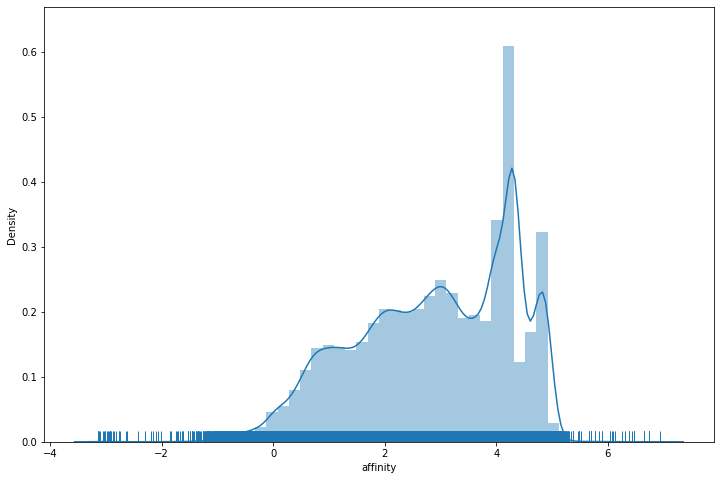

In [25]:
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
seaborn.distplot(np.log10(df_aggregated_mhc_virus_rf.affinity), rug=True)

In [26]:
df_r = pd.read_csv("mhc_sars2_purified_competitive_radioactivity.csv").set_index(["allele", "peptide"])
df_f = pd.read_csv("mhc_sars2_purified_direct_fluorescence.csv").set_index(["allele", "peptide"])

In [27]:
joined = df_r.join(df_f, how="inner", lsuffix="_r", rsuffix="_f")

In [28]:
r_null = joined["affinity_r"].isnull()
f_null = joined["affinity_f"].isnull()
either_null = r_null | f_null
neither_null = ~either_null
joined[neither_null]

affinity_r  min_affinity_r  max_affinity_r  \
allele      peptide                                                  
HLA-A*01:01 CTDDNALAY     0.776000           0.776           0.776   
            FMGRIRSVY   373.000000         373.000         373.000   
            ISDYDYYRY     2.700000           2.700           2.700   
            KSDGTGTIY     3.030000           3.030           3.030   
            NQDLNGNWY   527.000000         527.000         527.000   
            RVDFCGKGY   791.000000         791.000         791.000   
            VVDKYFDCY     2.680000           2.680           2.680   
HLA-A*02:01 ALWEIQQVV     0.150000           0.150           0.150   
            FVDGVPFVV     0.970500           0.970           0.971   
            ILHCANFNV     1.414921           1.400           1.430   
            KLWAQCVQL     4.684976           4.670           4.700   
            VLWAHGFEL     0.400999           0.400           0.402   
HLA-A*03:01 ALRANSAVK    18.200000          18.200          18.200   
            ATVVIGTSK   186.000000         186.000         186.000   
            AVLQSGFRK     6.780000           6.780           6.780   
            GVAMPNLYK     4.080000           4.080           4.080   
            KLFAAETLK    11.600000          11.600          11.600   
            KMQRMLLEK     6.980000           6.980           6.980   
            KTFPPTEPK   287.000000         287.000         287.000   
            MTNRQFHQK    21.500000          21.500          21.500   
            SSNVANYQK  1760.000000        1760.000        1760.000   
            VVYRGTTTY     7.730000           7.730           7.730   
            YIFFASFYY     2.260000           2.260           2.260   
HLA-A*11:01 ALRANSAVK  2480.000000        2480.000        2480.000   
            ATVVIGTSK     3.150000           3.150           3.150   
            AVLQSGFRK    10.300000          10.300          10.300   
            GVAMPNLYK     2.730000           2.730           2.730   
            KLFAAETLK    20.900000          20.900          20.900   
            KMQRMLLEK     4.390000           4.390           4.390   
            KTFPPTEPK   527.000000         527.000         527.000   
            MTNRQFHQK     4.950000           4.950           4.950   
            SSNVANYQK    48.500000          48.500          48.500   
            VVYRGTTTY   108.000000         108.000         108.000   
            YIFFASFYY     0.408000           0.408           0.408   
HLA-A*31:01 ALRANSAVK  1600.000000        1600.000        1600.000   
            AVLQSGFRK    21.200000          21.200          21.200   
            KLFAAETLK    80.500000          80.500          80.500   
            KTFPPTEPK   166.000000         166.000         166.000   
HLA-B*07:02 FPPTSFGPL    24.700000          24.700          24.700   
            FPRGQGVPI     4.100000           4.100           4.100   
            IPRRNVATL     3.480000           3.480           3.480   
            LPIDKCSRI   425.000000         425.000         425.000   
            MPASWVMRI    18.800000          18.800          18.800   
            TPRDLGACI   201.000000         201.000         201.000   

                       geometric_mean_affinity_r  num_entries_r  in_sars2_r  \
allele      peptide                                                           
HLA-A*01:01 CTDDNALAY                   0.776000              1        True   
            FMGRIRSVY                 373.000000              1        True   
            ISDYDYYRY                   2.700000              1        True   
            KSDGTGTIY                   3.030000              1        True   
            NQDLNGNWY                 527.000000              1        True   
            RVDFCGKGY                 791.000000              1        True   
            VVDKYFDCY                   2.680000              1        True   
HLA-A*02:01 ALWEIQQVV                   0.150000              2        True   
            F

In [29]:
df_aggregated_mhc_virus_rf.allele.str.split("-").map(lambda x: x[0]).value_counts()


HLA           85914
Mamu           5500
H2             4929
DRB1*08:01      743
DRB1*04:04      726
DRB1*07:01      725
DRB1*11:01      722
DRB1*09:01      718
DRB1*14:54      714
DRB3*03:01      708
DRB1*13:01      703
DRB1*03:01      703
DRB3*01:01      699
DRB4*01:03      681
Eqca            660
DRB3*02:02      645
DRB5*01:01      638
Patr            455
BoLA             30
DRB1*01:01       21
SLA               9
Gogo              1
DLA               1
Anpl              1
Name: allele, dtype: int64

In [30]:
from collections import defaultdict

def aggregate_tcell_results(
        df_tcell,
        use_assays={"ELISPOT", "ELISA", "3H-thymidine", "ICS", "multimer/tetramer", "51 chromium"},
        positive_labels={"Positive", "Positive-High"}, 
        max_peptide_length=35,
        output_csv_filename=None):
    if type(use_assays) is str:
        use_assays = {use_assays}
    elif type(use_assays) in (list, tuple):
        use_assays = set(use_assays)
    df_tcell_assay = df_tcell[df_tcell["Assay"]["Method/Technique"].isin(use_assays)]
    print("-- Selected %d entries for assays %s" % (len(df_tcell_assay), use_assays))
    
    measures = df_tcell_assay["Assay"]["Qualitative Measure"]
    measures_null = measures.isnull()
    print("-- Dropping %d entries with missing measure" % measures_null.sum())
    positives = measures.isin(positive_labels)
    peptides = df_tcell_assay["Epitope"]["Description"]
    peptides_valid = create_peptide_mask(peptides, max_peptide_length=max_peptide_length, min_peptide_length=8)
    peptides_invalid = ~peptides_valid
    
    print("-- Dropping %d/%d entries with invalid peptide sequences" % (
        peptides_invalid.sum(),
        len(peptides_invalid)))
    mhcs = df_tcell_assay["MHC"]["Allele Name"]
    mhc_mask = create_allele_mask(mhcs)
    mhcs_invalid = ~mhc_mask
    
    print("-- Dropping %d/%d entries with invalid MHC names" % (
        mhcs_invalid.sum(),
        len(mhcs_invalid)))
    
    invalid_mask = measures_null | peptides_invalid | mhcs_invalid
    
    
    valid_mask = (~invalid_mask).values
    
    n_subjects = df_tcell_assay["Assay"]["Number of Subjects Tested"]
    n_subjects = n_subjects[valid_mask]
    n_subjects_positive = df_tcell_assay["Assay"]["Number of Subjects Responded"]
    n_subjects_positive = n_subjects_positive[valid_mask]
    
    df_tcell_assay = df_tcell_assay[valid_mask]
    peptides = peptides[valid_mask]
    mhcs = mhcs[valid_mask]
    positives = positives[valid_mask]
    
    print("-- Keeping %d/%d entries" % (
        len(df_tcell_assay), len(valid_mask)))
    
    
    mhc_and_peptide_to_measures = defaultdict(list)
    mhc_and_peptide_to_n_subjects = defaultdict(list)
    mhc_and_peptide_to_n_subjects_pos = defaultdict(list)
    
    for mhc, peptide, pos, n_subj, n_subj_pos in zip(
            mhcs, peptides, positives, n_subjects, n_subjects_positive):
        mhc_and_peptide_to_measures[(mhc, peptide)].append(pos)
        if n_subj is not None and not np.isnan(n_subj) and n_subj > 0:
            if n_subj_pos is not None and not np.isnan(n_subj_pos):
                mhc_and_peptide_to_n_subjects[(mhc, peptide)].append(n_subj)
                mhc_and_peptide_to_n_subjects_pos[(mhc, peptide)].append(n_subj_pos)
        
    
    new_column_names = [
        "allele",
        "peptide",
        "fraction_entries_positive",
        "num_entries",
        "num_entries_with_subjects",
        "num_subjects",
        "num_subjects_positive",
        "fraction_subjects_positive",
    ]
    new_columns = OrderedDict([(name, []) for name in new_column_names])
    
    
    for (mhc, peptide) in sorted(mhc_and_peptide_to_measures.keys()):
        xs = mhc_and_peptide_to_measures[(mhc, peptide)]
        n_subjects_list = mhc_and_peptide_to_n_subjects.get((mhc, peptide), [])
        n_subjects_positive_list = mhc_and_peptide_to_n_subjects_pos.get((mhc, peptide), [])
        n_entries_with_subjects = len(n_subjects_list)
        total_n_subjects = sum(n_subjects_list)
        total_n_subjects_positive = sum(n_subjects_positive_list)
        
        new_columns["allele"].append(mhc)
        new_columns["peptide"].append(peptide)
        new_columns["fraction_entries_positive"].append(np.mean(xs))
        new_columns["num_entries"].append(len(xs))
        new_columns["num_entries_with_subjects"].append(n_entries_with_subjects)
        new_columns["num_subjects"].append(total_n_subjects)
        new_columns["num_subjects_positive"].append(total_n_subjects_positive)
        new_columns["fraction_subjects_positive"].append(
            total_n_subjects_positive / total_n_subjects
            if total_n_subjects > 0
            else 0.0)
    
    df_new = pd.DataFrame(new_columns)
    
    print("-- Aggregated %d raw entries into %d pMHC affinities" % (
        len(mhcs),
        len(df_new)))
    
    df_new = annotate_dataframe(df_new)
    write_dataframe(df_new, output_csv_filename)
    
    return df_new
   

In [31]:
# SARS T-cell entries
df_aggregated_tcell_sars= aggregate_tcell_results(df_tcell_sars, output_csv_filename="tcell_sars.csv");

# all coronavirus T-cell entries
df_aggregated_tcell_cov = aggregate_tcell_results(df_tcell_cov, output_csv_filename="tcell_cov.csv");

# all viral T-cell entries
df_aggregated_tcell_virus = aggregate_tcell_results(df_tcell_virus, output_csv_filename="tcell_virus.csv");

# all viral T-cell entries measured by tetramer 
df_aggregated_tcell_virus = aggregate_tcell_results(
    df_tcell_virus, 
    output_csv_filename="tcell_virus_tetramer.csv", 
    use_assays={"multimer/tetramer"});

# all viral T-cell entries measured by ELISPOT 
df_aggregated_tcell_virus = aggregate_tcell_results(
    df_tcell_virus, output_csv_filename="tcell_virus_elispot.csv", use_assays={"ELISPOT"});

# all viral T-cell entries measured by ICS 
df_aggregated_tcell_virus = aggregate_tcell_results(
    df_tcell_virus, output_csv_filename="tcell_virus_ics.csv", use_assays={"ICS"});


-- Selected 1389 entries for assays {'multimer/tetramer', '3H-thymidine', 'ELISA', 'ELISPOT', '51 chromium', 'ICS'}
-- Dropping 0 entries with missing measure
-- Dropping 2/1389 entries with invalid peptide sequences
-- Dropping 1154/1389 entries with invalid MHC names
-- Keeping 235/1389 entries
-- Aggregated 235 raw entries into 86 pMHC affinities
Species counts:
human    82
mouse     4
Name: species, dtype: int64
Wrote 86 items to tcell_sars.csv (30.23% in SARS2)
-- Selected 1417 entries for assays {'multimer/tetramer', '3H-thymidine', 'ELISA', 'ELISPOT', '51 chromium', 'ICS'}
-- Dropping 0 entries with missing measure
-- Dropping 2/1417 entries with invalid peptide sequences
-- Dropping 1169/1417 entries with invalid MHC names
-- Keeping 248/1417 entries
-- Aggregated 248 raw entries into 98 pMHC affinities
Species counts:
human    82
mouse    16
Name: species, dtype: int64
Wrote 98 items to tcell_cov.csv (26.53% in SARS2)
-- Selected 122605 entries for assays {'multimer/tetramer',

In [32]:
df_aggregated_tcell_virus.allele.value_counts()[:50]

HLA-A*02:01       319
H2-Db             257
H2-Kb             250
HLA-B*07:02       110
H2-IAb             99
H2-Kd              83
HLA-B*15:01        83
HLA-DRB1*01:01     80
HLA-A*24:02        42
H2-Ld              40
H2-Dd              33
HLA-A*01:01        33
HLA-A*11:01        30
HLA-B*08:01        26
H2-IEd             21
H2-IAd             19
HLA-B*35:01        18
HLA-DRB1*15:01     18
HLA-A*29:02        14
HLA-DRB1*04:01     11
HLA-A*03:01        10
HLA-B*27:05         9
HLA-B*58:01         9
HLA-A*68:01         8
HLA-DRB1*07:01      8
H2-IEk              6
HLA-DRB1*03:01      6
HLA-DRB1*09:01      6
HLA-B*57:01         5
HLA-B*40:01         5
HLA-DRB1*11:01      5
HLA-B*51:01         4
HLA-C*06:02         4
HLA-DRB1*04:04      4
HLA-A*33:03         4
HLA-B*40:02         4
Patr-A*03:01        4
HLA-B*27:02         3
HLA-B*55:02         3
HLA-DPB1*05:01      3
HLA-B*18:01         3
HLA-B*35:08         3
H2-Kk               3
HLA-DPB1*09:01      3
HLA-B*55:01         3
Patr-B*03:

In [33]:
df_tcell[df_tcell["Epitope"]["Description"].str.contains(" ")]["Epitope"]

,Epitope IRI,Object Type,Description,Starting Position,Ending Position,Non-peptidic epitope IRI,Antigen Name,Antigen IRI,Parent Protein,Parent Protein IRI,Organism Name,Organism IRI,Parent Species,Epitope Comments
876,http://www.iedb.org/epitope/150406,Linear peptide,"LSAYDPVDYPYSNSFAKC + D-aa(L1, S2, A3, Y4, D5, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The N-terminus was acetylated and the C-termin...
1150,http://www.iedb.org/epitope/41710,Linear peptide,MIGWII + FORM(M1),1.0,6.0,NaN,Listeria epitope LemA,http://www.ncbi.nlm.nih.gov/protein/Q8Y8E2,Listeria epitope LemA,http://www.uniprot.org/uniprot/Q8Y8E2,Listeria monocytogenes,http://purl.obolibrary.org/obo/NCBITaxon_1639,Listeria monocytogenes,NaN
1230,http://www.iedb.org/epitope/41789,Linear peptide,MIVIL + FORM(M1),1.0,5.0,NaN,lmo1602,http://www.ncbi.nlm.nih.gov/protein/CAC99680.1,Lmo1602 protein,http://www.uniprot.org/uniprot/Q8Y6T1,Listeria monocytogenes,http://purl.obolibrary.org/obo/NCBITaxon_1639,Listeria monocytogenes,NaN
1231,http://www.iedb.org/epitope/41790,Linear peptide,MIVILTLF + FORM(M1),NaN,NaN,NaN,putative transcriptional attenuator leader pep...,https://ontology.iedb.org/ontology/ONTIE_0002068,NaN,NaN,Listeria monocytogenes,http://purl.obolibrary.org/obo/NCBITaxon_1639,Listeria monocytogenes,NaN
1236,http://www.iedb.org/epitope/41710,Linear peptide,MIGWII + FORM(M1),1.0,6.0,NaN,Listeria epitope LemA,http://www.ncbi.nlm.nih.gov/protein/Q8Y8E2,Listeria epitope LemA,http://www.uniprot.org/uniprot/Q8Y8E2,Listeria monocytogenes,http://purl.obolibrary.org/obo/NCBITaxon_1639,Listeria monocytogenes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330828,http://www.iedb.org/epitope/738919,Linear peptide,FLPILMHWWRAESDEARRCY + ACET(F1),191.0,210.0,NaN,Beta-1 adrenergic receptor,http://www.ncbi.nlm.nih.gov/protein/P34971.2,Beta-1 adrenergic receptor,http://www.uniprot.org/uniprot/P34971,Mus musculus,http://purl.obolibrary.org/obo/NCBITaxon_10090,Mus musculus,NaN
330829,http://www.iedb.org/epitope/738440,Linear peptide,AESDEARRCYNDPKCCDFVT + ACET(A1),201.0,220.0,NaN,Beta-1 adrenergic receptor,http://www.ncbi.nlm.nih.gov/protein/P34971.2,Beta-1 adrenergic receptor,http://www.uniprot.org/uniprot/P34971,Mus musculus,http://purl.obolibrary.org/obo/NCBITaxon_10090,Mus musculus,NaN
330830,http://www.iedb.org/epitope/738919,Linear peptide,FLPILMHWWRAESDEARRCY + ACET(F1),191.0,210.0,NaN,Beta-1 adrenergic receptor,http://www.ncbi.nlm.nih.gov/protein/P34971.2,Beta-1 adrenergic receptor,http://www.uniprot.org/uniprot/P34971,Mus musculus,http://purl.obolibrary.org/obo/NCBITaxon_10090,Mus musculus,NaN
330831,http://www.iedb.org/epitope/738440,Linear peptide,AESDEARRCYNDPKCCDFVT + ACET(A1),201.0,220.0,NaN,Beta-1 adrenergic receptor,http://www.ncbi.nlm.nih.gov/protein/P34971.2,Beta-1 adrenergic receptor,http://www.uniprot.org/uniprot/P34971,Mus musculus,http://purl.obolibrary.org/obo/NCBITaxon_10090,Mus musculus,NaN


In [34]:
names = df_mhc["Epitope"]["Organism Name"]
names[names.str.contains("virus", na=False)].value_counts()

Vaccinia virus WR                                                  35347
Yellow fever virus                                                 16846
SARS coronavirus Tor2                                               9290
Zaire ebolavirus                                                    7176
Lymphocytic choriomeningitis virus (strain Armstrong)               4249
                                                                   ...  
Influenza A virus (A/California/04/2007(H1N1))                         1
Influenza A virus (A/Cygnus olor/Czech Republic/10732/07(H5N1))        1
Foot-and-mouth disease virus (strain A12)                              1
Influenza A virus (A/Hong Kong/488/97(H5N1))                           1
Influenza A virus (A/mallard/Sweden/S90391/2005(H3N8))                 1
Name: Organism Name, Length: 850, dtype: int64

In [35]:
names.value_counts()[:50]

Homo sapiens                                             388703
Rattus norvegicus                                         64710
Vaccinia virus WR                                         35347
unidentified                                              26919
Mus musculus                                              21948
Phleum pratense                                           17818
Yellow fever virus                                        16846
Mycobacterium tuberculosis                                10095
SARS coronavirus Tor2                                      9290
Zaire ebolavirus                                           7176
Giardia lamblia ATCC 50803                                 4473
Lymphocytic choriomeningitis virus (strain Armstrong)      4249
SARS coronavirus                                           4062
Vaccinia virus Copenhagen                                  3261
Junin mammarenavirus                                       2899
Sabia mammarenavirus                    

In [36]:
df_aggregated_mhc_virus_r.allele.value_counts()[:10]

HLA-DRB1*01:01    5718
HLA-A*02:01       4636
HLA-A*03:01       2777
HLA-A*11:01       2770
HLA-A*02:03       2737
HLA-A*02:06       2695
HLA-A*31:01       2693
HLA-A*68:01       2667
HLA-A*33:01       2646
HLA-A*68:02       2591
Name: allele, dtype: int64

In [37]:
df_aggregated_mhc_virus_r.allele.str.contains("DQ").sum()

17

In [38]:
df_mhc[(df_mhc["Epitope"]["Organism Name"].str.contains('virus', na=False) & df_mhc["MHC"]["Allele Name"].str.contains("DQ"))]["Assay"]["Method/Technique"].value_counts()

purified MHC/direct/fluorescence          5839
purified MHC/competitive/fluorescence       85
purified MHC/competitive/radioactivity      26
cellular MHC/direct/fluorescence             7
lysate MHC/direct/fluorescence               6
purified MHC/direct/radioactivity            2
x-ray crystallography                        1
cellular MHC/mass spectrometry               1
Name: Method/Technique, dtype: int64

In [39]:
df_aggregated_tcell_virus[df_aggregated_tcell_virus.mhc_class == "?"].allele.value_counts()

SLA-1*04:01    2
Name: allele, dtype: int64

In [40]:

df_mhc[df_mhc["MHC"]["Allele Name"].str.contains("DQB")]["Epitope"]["Organism Name"].value_counts()[:30]

Homo sapiens                        20414
Yellow fever virus                   5824
Phleum pratense                      4090
Mycobacterium tuberculosis            743
Blattella germanica                   410
Farfantepenaeus aztecus               359
Lolium perenne                        316
Burkholderia pseudomallei K96243      302
Dermatophagoides pteronyssinus        257
Poa pratensis                         180
Alternaria alternata                  180
Triticum aestivum                     168
Cladosporium herbarum                 135
Phalaris aquatica                     126
Felis catus                           108
Penicillium chrysogenum                82
Betula pendula                         81
Quercus alba                           81
Coxsackievirus B4 (strain E2)          74
Dactylis glomerata                     72
Cupressus sempervirens                 72
Plasmodium falciparum                  68
Chamaecyparis obtusa                   63
Hesperocyparis arizonica          

In [41]:
df_tcell[df_tcell["Epitope"]["Organism Name"].str.contains("virus", na=False)]["Epitope"]["Organism Name"].value_counts()[:40]

Vaccinia virus                                                       22234
Vaccinia virus WR                                                     9615
Hepatitis C virus subtype 1a                                          5626
Hepacivirus C                                                         3399
Human gammaherpesvirus 4                                              3140
Human betaherpesvirus 6B                                              2808
Human alphaherpesvirus 2                                              2798
Hepatitis C virus subtype 1b                                          2541
Lymphocytic choriomeningitis virus (strain Armstrong)                 2541
Dengue virus 2                                                        2380
Human betaherpesvirus 5                                               2353
Dengue virus 3                                                        2284
Influenza A virus                                                     2192
Human papillomavirus type

In [42]:
df_tcell[
    (df_tcell["Assay"]["Method/Technique"] == "ELISPOT") & 
    df_tcell["MHC"]["Allele Name"].str.startswith("HLA-", na=False)].iloc[1000]

Reference       Assay IRI                                http://www.iedb.org/assay/1280875
                Reference IRI                        http://www.iedb.org/reference/1001794
                Type                                                            Submission
                PubMed ID                                                              NaN
                Authors                  Carla Oseroff; Valerie Pasquetto; Alessandro S...
                                                               ...                        
Assay Antigen   Antigen Organism Name                                       Vaccinia virus
                Antigen Organism IRI        http://purl.obolibrary.org/obo/NCBITaxon_10245
                Organism Species Name                                       Vaccinia virus
                Organism Species IRI        http://purl.obolibrary.org/obo/NCBITaxon_10245
Assay Comments  Assay Comments                                                         NaN

In [43]:
df_tcell

Reference  \
                                Assay IRI   
0            http://www.iedb.org/assay/29   
1            http://www.iedb.org/assay/37   
2            http://www.iedb.org/assay/42   
3            http://www.iedb.org/assay/43   
4            http://www.iedb.org/assay/47   
...                                   ...   
331173  http://www.iedb.org/assay/3795987   
331174  http://www.iedb.org/assay/3796832   
331175  http://www.iedb.org/assay/3796858   
331176  http://www.iedb.org/assay/3796859   
331177  http://www.iedb.org/assay/3796861   

                                                                       \
                                Reference IRI        Type   PubMed ID   
0           http://www.iedb.org/reference/274  Literature  15448372.0   
1           http://www.iedb.org/reference/281  Literature   7684468.0   
2           http://www.iedb.org/reference/283  Literature  15634878.0   
3           http://www.iedb.org/reference/283  Literature  15634878.0   
4           http://www.iedb.org/reference/275  Literature  15519708.0   
...                                       ...         ...         ...   
331173  http://www.iedb.org/reference/1032231  Literature  28566275.0   
331174  http://www.iedb.org/reference/1032690  Literature  29246474.0   
331175  http://www.iedb.org/reference/1032690  Literature  29246474.0   
331176  http://www.iedb.org/reference/1032690  Literature  29246474.0   
331177  http://www.iedb.org/reference/1032690  Literature  29246474.0   

                                                                              \
                                                  Authors      Journal  Date   
0       Yi-Hsiang Huang; Mi-Hua Tao; Cheng-po Hu; Wan-...  J Gen Virol  2004   
1       V J La Posta; D D Auperin; R Kamin-Lewis; G A ...      J Virol  1993   
2         Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh    J Immunol  2005   
3         Evan R Jellison; Sung-Kwon Kim; Raymond M Welsh    J Immunol  2005   
4       Olivier B Engler; Reto A Schwendener; Wen Juan...      Vaccine  2004   
...                                                   ...          ...   ...   
331173  Susan E Murray; Pavlo A Nesterenko; Adam L Van...    J Exp Med  2017   
331174  Maria Malm; Kirsi Tamminen; Suvi Heinim&auml;k...      Vaccine  2018   
331175  Maria Malm; Kirsi Tamminen; Suvi Heinim&auml;k...      Vaccine  2018   
331176  Maria Malm; Kirsi Tamminen; Suvi Heinim&auml;k...      Vaccine  2018   
331177  Maria Malm; Kirsi Tamminen; Suvi Heinim&auml;k...      Vaccine  2018   

                                                                         \
                                                    Title Submission ID   
0       Identification of novel HLA-A*0201-restricted ...           NaN   
1       Cross-protection against lymphocytic choriomen...           NaN   
2       Cutting edge: MHC class II-restricted killing ...           NaN   
3       Cutting edge: MHC class II-restricted killing ...           NaN   
4       A liposomal peptide vaccine inducing CD8+ T ce...           NaN   
...                                                   ...           ...   
331173  Fibroblast-adapted human CMV vaccines elicit p...           NaN   
331174  Functionality and avidity of norovirus-specifi...           NaN   
331175  Functionality and avidity of norovirus-specifi...           NaN   
331176  Functionality and avidity of norovirus-specifi...           NaN   
331177  Functionality and avidity of norovirus-specifi...           NaN   

                                   Epitope  ...            Assay Antigen  \
                               Epitope IRI  ... Non-peptidic Antigen IRI   
0        http://www.iedb.org/epitope/31803  ...                      NaN   
1        http://www.iedb.org/epitope/25946  ...                      NaN   
2        http://www.iedb.org/epitope/21045  ...                      NaN   
3        http://www.iedb.org/epitope/58012  ...                      NaN   
4         http://www.ie